# Web Scraping

Scraping observations from waarneming.nl

Experiment by Dennis van den Berg

## Libraries and settings

In [1]:
# Import libraries
import requests                        # Http requests
from bs4 import BeautifulSoup          # Web scraping
import pandas as pd                    # For dataframes
from PIL import Image                  # For image loading
from io import BytesIO                 # For image loading

%matplotlib inline

## Functions

In [40]:
# Web scraping
def scrape_url_to_soup(url):
    # Request content from web page
    r = requests.get(url)

    # Convert to Beautiful Soup Object
    soup = BeautifulSoup(r.content, features="lxml")    
    
    return(soup)

# Load image
def load_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    
    return(image)

# Convert beautiful soup object to clean dataframe
def process_soup_to_dataframe(soup, url_prefix=''):
    # Select relevant contents from web page soup
    thumbnails = soup.find_all('a', rel='Thumbnail')

    # Create empty dataframe
    df_observations = pd.DataFrame()

    # Parse and append table contents one by one
    for thumbnail in thumbnails:
        try:
            # Retrieve variables per entry
            #image_url = thumbnail['href']
            thumbnail_url_short = thumbnail.find('img')['src']
            title = thumbnail.find('img')['title']
            
            # Process variables
            thumbnail_url = url_prefix + thumbnail_url_short
            
            # Load thumbnail image
            thumbnail_img = load_image_from_url(thumbnail_url)
            
            # Append rows to dataframe
            row = {'title': title, 'thumbnail_url': thumbnail_url, 'image': thumbnail_img}

            df_observations = df_observations.append(row, ignore_index=True)
        except:
            pass
    
    # Split 'title' into 'dutch_name' and 'latin_name'
    df_observations['dutch_name'] = df_observations['title'].str.split(' - ').str[0]
    df_observations['latin_name'] = df_observations['title'].str.split(' - ').str[1]
    df_observations.drop('title', axis=1, inplace=True)
        
    return(df_observations)

## Scraped Results

In [41]:
# Define web page to scrape
url = 'https://waarneming.nl/foto/index?g=1&t=0&id_kleed=0&id_akt=0&z=0&sort=photo&only_val=1&exo_not=0&exo_only=0&type_foto=0&from=2018-02-12&to=2018-03-12&only_rated=1'
#url = 'https://waarneming.nl/foto/index?g=1&t=164&genus=0&id_kleed=0&id_akt=0&z=0&sort=photo&only_val=0&exo_not=0&exo_only=0&type_foto=0&from=2018-03-12&to=2018-03-12&only_rated=0'
url_prefix = 'https://waarneming.nl'

# Web scraping
soup = scrape_url_to_soup(url)
df_observations = process_soup_to_dataframe(soup, url_prefix=url_prefix)

In [42]:
df_observations.head()

,image,thumbnail_url,dutch_name,latin_name
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,https://waarneming.nl/fotonew/5/16080565.jpg?w...,Zanglijster,Turdus philomelos
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,https://waarneming.nl/fotonew/0/16067190.jpg?w...,Grutto,Limosa limosa
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,https://waarneming.nl/fotonew/9/16067189.jpg?w...,Grutto,Limosa limosa
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,https://waarneming.nl/fotonew/6/16096186.jpg?w...,Kokardezaagbek,Lophodytes cucullatus
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,https://waarneming.nl/fotonew/3/16097463.jpg?w...,Kraanvogel,Grus grus


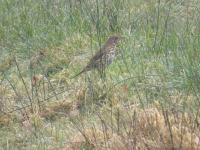

In [47]:
df_observations.image[0]

## TO DO

- Load observations from follow-up pages
- Variable observation categories (instead of fixed url that includes fixed catgory)
- Only select on image quality greater than threshold
- Save images?

In [73]:
# Selection criteria
groupname = 'Vogels'
rating_threshold = 3
from_date = '2018-02-12'
to_date = '2018-03-12'
page = 2

# Dict of species groups
groups = {"Alle": 0, "Vogels": 1, "Zoogdieren": 2, "Reptielen en amfibieën": 3,
         "Dagvlinders": 4, "Nachtvlinders en micro's": 8, "Libellen": 5,
         "Sprinkhanen en krekels": 14, "Vissen": 9, "Bijen, wespen en mieren": 17,
         "Vliegen en muggen": 18, "Kevers": 16, "Wantsen, cicaden en plantenluizen": 15,
         "Insecten (overig)": 6, "Geleedpotigen (overig)": 13, "Weekdieren": 7,
         "Overige ongewervelden": 20, "Planten": 10, "Algen, wieren en eencelligen": 19,
         "Mossen en korstmossen": 12, "Paddenstoelen": 11, "Verstoringen": 30}

# Derive complete url
url = 'https://waarneming.nl/foto/index?' + \
    '&only_val=1' + \
    '&type_foto=1' + \
    'g=' + str(groups[groupname]) + \
    '&from=' + from_date + \
    '&to=' + to_date + \
    '&only_rated=' + str(rating_threshold) + \
    '&page=' + str(page)

# Print url
url

'https://waarneming.nl/foto/index?&only_val=1&type_foto=1g=1&from=2018-02-12&to=2018-03-12&only_rated=3&page=2'